# Importing libraries....

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import missingno as msno
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
# filter warnings....
warnings.filterwarnings("ignore")

# EDA

In [3]:
plt.style.use("seaborn-pastel")

In [4]:
# getting the data....
df = pd.read_csv("smoke_detection_iot.csv")
df.head(10)

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.00,0.0,0.000,0.00,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.00,0.0,0.000,0.00,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.00,0.0,0.000,0.00,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.00,0.0,0.000,0.00,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.00,0.0,0.000,0.00,4,0
5,5,1654733336,20.073,54.12,0,400,12419,18998,939.725,0.0,0.00,0.0,0.000,0.00,5,0
6,6,1654733337,20.088,53.61,0,400,12432,19058,939.738,0.0,0.00,0.0,0.000,0.00,6,0
7,7,1654733338,20.103,53.20,0,400,12439,19114,939.758,0.0,0.00,0.0,0.000,0.00,7,0
8,8,1654733339,20.117,52.81,0,400,12448,19155,939.758,0.0,0.00,0.0,0.000,0.00,8,0
9,9,1654733340,20.132,52.46,0,400,12453,19195,939.756,0.9,3.78,0.0,4.369,2.78,9,0


In [5]:
# rename column names...
df = df.rename(columns={"Temperature[C]" : "Temperature", "Humidity[%]" : "Humidity", "TVOC[ppb]" : "TVOC",
                       "eCO2[ppm]" : "eCO2" , "Pressure[hPa]" : "Pressure", })
df.tail()

,Unnamed: 0,UTC,Temperature,Humidity,TVOC,eCO2,Raw H2,Raw Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0
62629,62629,1655130051,19.299,16.52,643,400,13696,20543,936.676,0.57,0.59,3.90,0.607,0.014,5743,0


In [6]:
# getting the data info....
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   62630 non-null  int64  
 1   UTC          62630 non-null  int64  
 2   Temperature  62630 non-null  float64
 3   Humidity     62630 non-null  float64
 4   TVOC         62630 non-null  int64  
 5   eCO2         62630 non-null  int64  
 6   Raw H2       62630 non-null  int64  
 7   Raw Ethanol  62630 non-null  int64  
 8   Pressure     62630 non-null  float64
 9   PM1.0        62630 non-null  float64
 10  PM2.5        62630 non-null  float64
 11  NC0.5        62630 non-null  float64
 12  NC1.0        62630 non-null  float64
 13  NC2.5        62630 non-null  float64
 14  CNT          62630 non-null  int64  
 15  Fire Alarm   62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [7]:
# checking the shape of data...
df.shape

(62630, 16)

In [8]:
# checking for null values...
df.isna().sum()

Unnamed: 0     0
UTC            0
Temperature    0
Humidity       0
TVOC           0
eCO2           0
Raw H2         0
Raw Ethanol    0
Pressure       0
PM1.0          0
PM2.5          0
NC0.5          0
NC1.0          0
NC2.5          0
CNT            0
Fire Alarm     0
dtype: int64

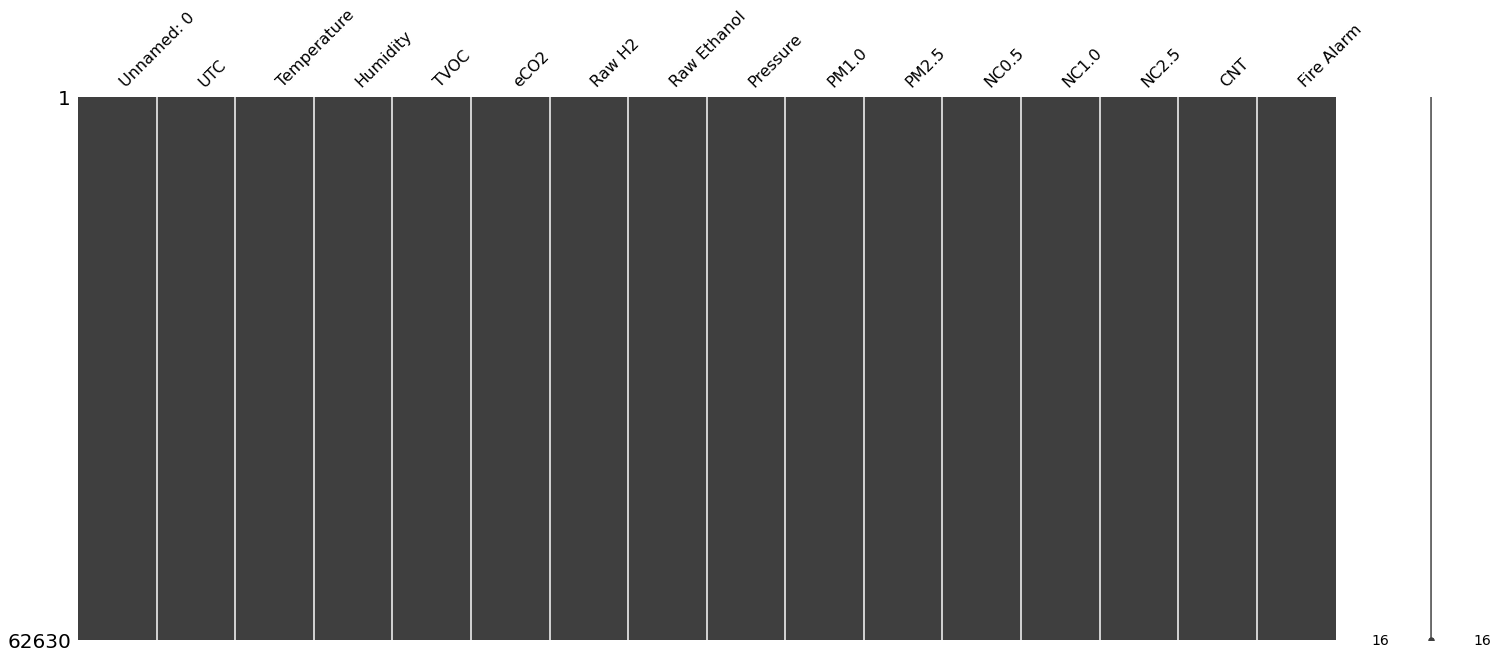

In [9]:
# visualizing the null values...
msno.matrix(df);

In [10]:
# unique values in each column
features = df.columns
for feature in features:
    print(f"{feature} ----> {df[feature].nunique()}")

Unnamed: 0 ----> 62630
UTC ----> 62630
Temperature ----> 21672
Humidity ----> 3890
TVOC ----> 1966
eCO2 ----> 1713
Raw H2 ----> 1830
Raw Ethanol ----> 2659
Pressure ----> 2213
PM1.0 ----> 1337
PM2.5 ----> 1351
NC0.5 ----> 3093
NC1.0 ----> 4113
NC2.5 ----> 1161
CNT ----> 24994
Fire Alarm ----> 2


In [11]:
# checking the target label proportion in the data...
alarm = df["Fire Alarm"].value_counts()
alarm 

1    44757
0    17873
Name: Fire Alarm, dtype: int64

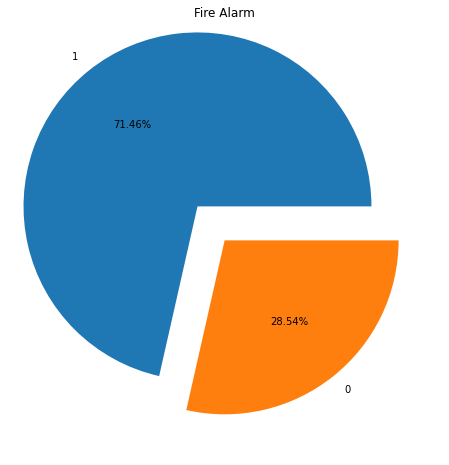

In [12]:
# let's visualize the proportion
plt.figure(figsize=(10,8))
labels = alarm.index
colors = sns.color_palette("tab10")
explode = [0.25,0]
plt.pie(alarm,labels = labels, colors = colors, autopct = "%.2f%%",explode=explode)
plt.title("Fire Alarm")
plt.show()

In [13]:
# get some random samples of the data..
df.sample(10)

,Unnamed: 0,UTC,Temperature,Humidity,TVOC,eCO2,Raw H2,Raw Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
49252,49252,1654785601,26.780,47.65,1208,400,13017,19429,938.779,2.54,2.64,17.48,2.725,0.062,24258,1
40173,40173,1654776522,24.470,53.48,1082,439,12870,19457,938.806,2.12,2.20,14.59,2.275,0.051,15179,1
23613,23613,1654756944,-19.719,49.33,1412,424,12967,19371,938.701,1.64,1.70,11.29,1.760,0.040,23613,1
57247,57247,1655124669,25.602,44.45,60,415,12834,20728,937.586,2.46,2.55,16.91,2.637,0.060,361,0
50127,50127,1654903144,26.160,60.13,544,1816,12868,19425,931.214,9330.18,25042.51,25651.51,28370.426,15125.117,139,1
50173,50173,1654903190,24.760,33.19,0,792,13296,20004,931.091,292.52,303.97,2013.13,314.019,7.149,185,1
38129,38129,1654774478,24.490,53.06,1132,534,12833,19450,938.910,2.07,2.15,14.27,2.226,0.050,13135,1
49130,49130,1654785479,26.750,47.44,1136,400,13040,19440,938.747,2.34,2.43,16.10,2.511,0.057,24136,1
33323,33323,1654769672,20.670,51.32,315,400,13105,19947,939.380,0.36,0.37,2.45,0.382,0.009,8329,1
41018,41018,1654777367,26.320,51.17,1084,400,12890,19454,938.791,1.99,2.06,13.67,2.132,0.048,16024,1


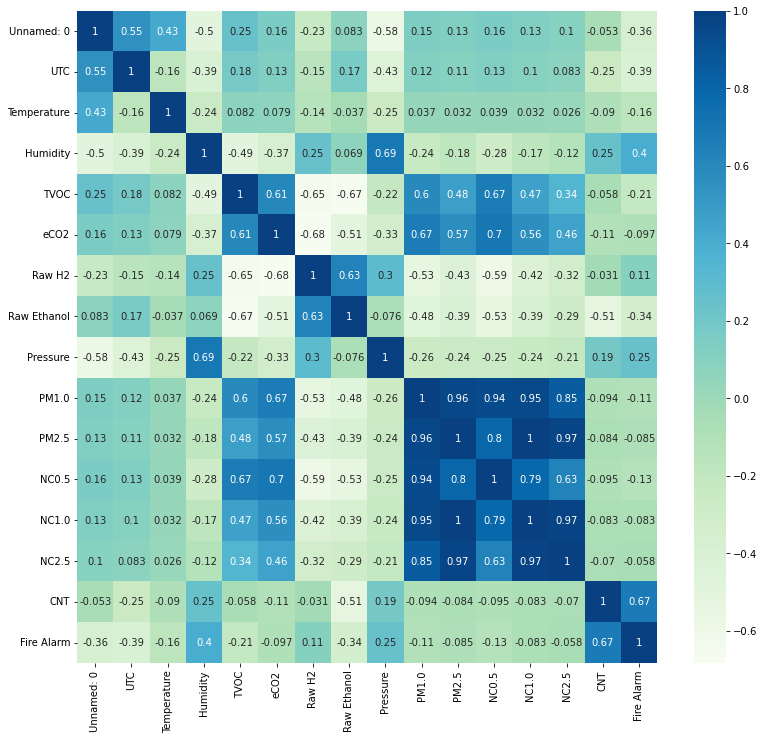

In [14]:
# checking the correlation among the data...
plt.figure(figsize=(13,12))
cor = df.corr()
sns.heatmap(cor,annot=True, cmap ="GnBu");

We can say that CNT, Pressure and Humidity have good correlation with the Target feature.
Humidity also has very good correlation with the Presssure and vice versa.

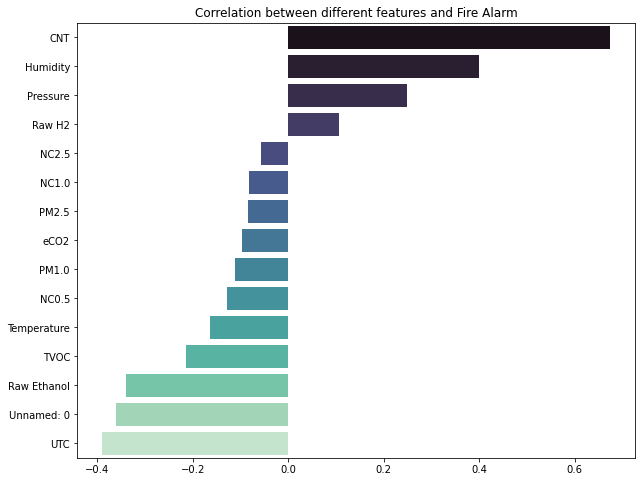

In [15]:
plt.figure(figsize=(10,8))
corr = df.corr()["Fire Alarm"].sort_values(ascending=False)
ind = corr.index
labels = []
cor = []
for i in range(1,len(ind)):
    labels.append(ind[i])
    cor.append(corr[i])
    
sns.barplot(cor,labels,palette = "mako")
plt.title("Correlation between different features and Fire Alarm")
plt.show();

In [16]:
# from above figure we have to drop some columns which are unnecessary
df.drop(columns = ['Unnamed: 0','UTC','CNT'],inplace = True)

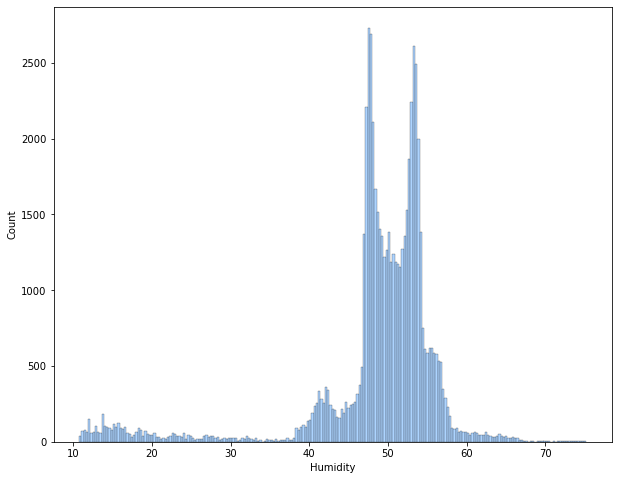

In [17]:
# checking the humidity 
plt.figure(figsize=(10,8))
sns.histplot(df["Humidity"]);

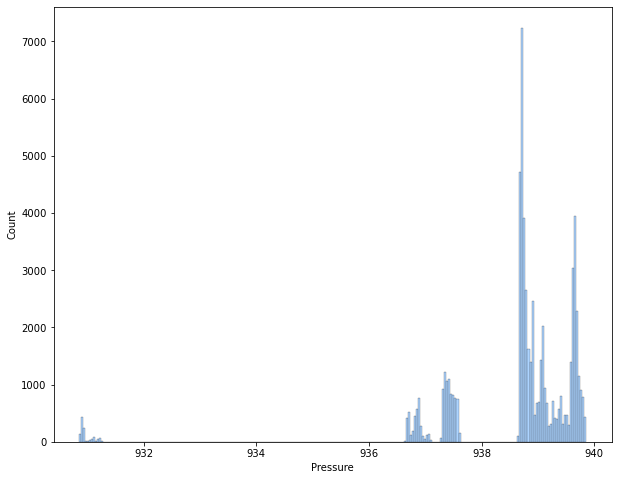

In [18]:
# checking the pressure distribution...
plt.figure(figsize=(10,8))
sns.histplot(df["Pressure"]);

# Outliers

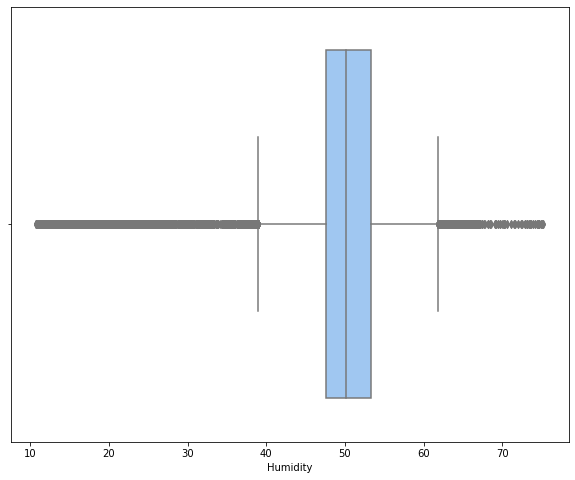

In [19]:
# In statistics, outlier is defined as the observation that is far from the other observations.
# we'll select the 4 features for outliers checking
# first we'll check the Univariate outliers using Boxplot, outliers may be spotted as as individual points...
# plot the Humidity feature....
plt.figure(figsize=(10,8))
sns.boxplot(df["Humidity"]);

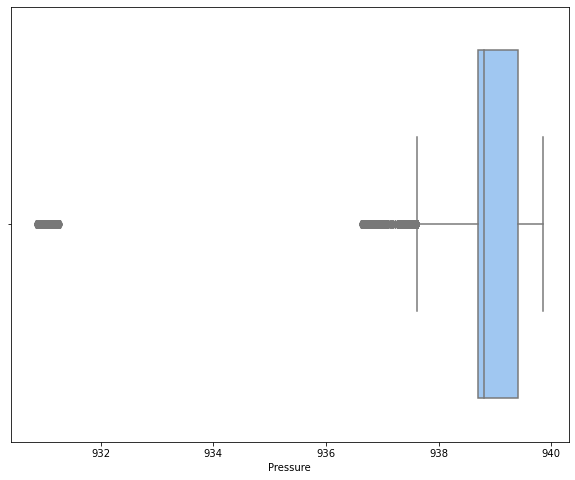

In [20]:
# check the Pressure feature...
plt.figure(figsize=(10,8))
sns.boxplot(df["Pressure"]);

Text(0.5, 1.0, 'Raw H2 Outlier Check')

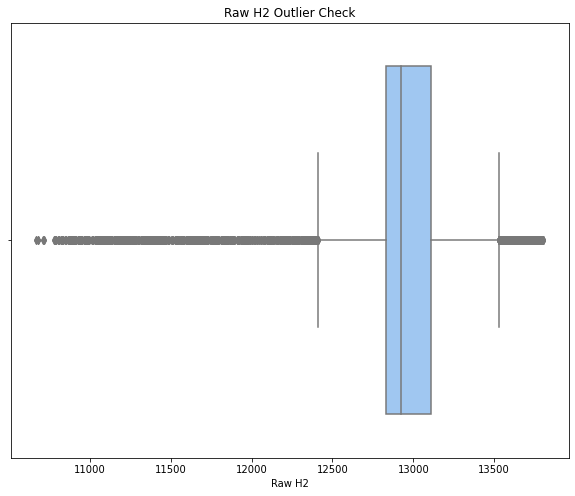

In [21]:
# check the H2 feature....
plt.figure(figsize=(10,8))
sns.boxplot(df["Raw H2"]);
plt.title("Raw H2 Outlier Check")

In [22]:
# find the quantile...
q1,q3 = df.quantile(0.25),df.quantile(0.75)
iqr = q3 - q1
print(iqr)

Temperature      14.41525
Humidity          5.71000
TVOC           1059.00000
eCO2             38.00000
Raw H2          279.00000
Raw Ethanol     643.00000
Pressure          0.71800
PM1.0             0.81000
PM2.5             0.84000
NC0.5             5.60000
NC1.0             0.86500
NC2.5             0.01800
Fire Alarm        1.00000
dtype: float64


In [24]:
# filter the data based on outliers......
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr
new_df = df[~((df < ll) | (df > ul)).any(axis=1)]
new_df

,Temperature,Humidity,TVOC,eCO2,Raw H2,Raw Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
240,23.056,51.11,1,400,12626,19698,939.810,0.08,0.14,0.43,0.156,0.056,0
247,23.131,50.08,5,400,12633,19696,939.813,0.09,0.17,0.46,0.189,0.074,0
248,23.142,50.00,0,400,12629,19704,939.790,0.10,0.17,0.49,0.189,0.072,0
249,23.153,49.85,12,400,12630,19698,939.791,0.10,0.18,0.50,0.195,0.074,0
250,23.163,49.71,11,400,12637,19710,939.812,0.10,0.17,0.49,0.192,0.073,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56967,24.173,44.99,17,415,12863,20774,937.630,2.18,2.26,15.00,2.340,0.053,0
56968,24.212,45.00,27,426,12853,20763,937.634,2.18,2.26,15.00,2.339,0.053,0
56969,24.251,45.00,7,414,12870,20795,937.624,2.17,2.26,14.95,2.332,0.053,0
56971,24.329,42.89,31,415,12871,20756,937.625,2.15,2.24,14.81,2.310,0.052,0


In [25]:
# comparing the shape of both data frames...
print(f"Old Data Frame has {df.shape[0]} rows\n")
print(f"New Data Frame has {new_df.shape[0]} rows")

Old Data Frame has 62630 rows

New Data Frame has 35689 rows


# Data Preprocessing

In [26]:
# separate X and y
X = new_df.drop("Fire Alarm",axis=1)
y = new_df["Fire Alarm"]

In [27]:
# splitting the train and test set....
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.25,
                                                   random_state = 42)
# checking the size....
len(X_train), len(y_train), len(X_test), len(y_test)

(26766, 26766, 8923, 8923)

In [28]:
# as values in the data are in different ranges so we'll transform all features by scaling it to given range....
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
X_train

array([[0.77805148, 0.56847291, 0.8261745 , ..., 0.545961  , 0.5416291 ,
        0.51428571],
       [0.0516288 , 0.44876847, 0.07986577, ..., 0.42107707, 0.41538924,
        0.37142857],
       [0.89367585, 0.49014778, 0.88322148, ..., 0.67455896, 0.6714758 ,
        0.65714286],
       ...,
       [0.64990951, 0.58916256, 0.77114094, ..., 0.44568245, 0.44063721,
        0.4       ],
       [0.90697265, 0.52807882, 0.        , ..., 0.14391829, 0.13585813,
        0.07142857],
       [0.01988236, 0.44581281, 0.8704698 , ..., 0.61188487, 0.60805531,
        0.58571429]])

# Modelling

    We'll build a series a models and select the one that perfroms best.

In [30]:
# let's make a function that will takes models and return it scores

def build_model(models,X_train,y_train,X_test,y_test):
    
    names = []
    scores = []
    for name,model in models.items():
        names.append(name)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        scores.append(accuracy_score(y_test,y_pred))
        final_scores = pd.DataFrame({'Name':names,'Accuracy':scores,})
    return final_scores

In [31]:
models = {"KNN" : KNeighborsClassifier(), "LogisticRegression" : LogisticRegression(),
         "SupportVector" : SVC(), "NaiveBayesClf" : GaussianNB(), "DecisionTreeClf" : DecisionTreeClassifier(),
         "RandomForestClf" : RandomForestClassifier(), "ExtraTreeClf" : ExtraTreesClassifier(), 
         "AdaBoostClf" : AdaBoostClassifier()}

In [32]:
scores = build_model(models,X_train,y_train,X_test,y_test)
scores

,Name,Accuracy
0,KNN,0.999664
1,LogisticRegression,0.984758
2,SupportVector,0.999776
3,NaiveBayesClf,0.917404
4,DecisionTreeClf,0.999664
5,RandomForestClf,0.999664
6,ExtraTreeClf,0.999888
7,AdaBoostClf,1.000000
